# Laboratorio 1 Diseño de Algoritmos

Conteste todas las preguntas y luego suba el notebook solucionado a uvirtual.


**Pregunta 1:** Escriba el pseudocodigo de un algoritmo **iterativo** que reciba como parámetro un arreglo y un número entero x mayor que 1 y entregue como salida la cantidad de elementos del arreglo que son divisibles por x.

divisorArreglo(A[1,...,n], x)
	resultado = 0
	para i = 0 hasta n - 1
		if A[i] MOD x == 0: 
			resultado += 1
	retornar resultado

**Pregunta 2:** Calcule la complejidad de su algoritmo en el peor caso.




T(n) = 7n + 5 => O(n)

**Pregunta 3:** Implemente su algoritmo. Cree una instancia del problema y pruebelo.

In [59]:
def divisorArreglo_Iter(A, x):
  i = 0
  resultado = 0
  for i in range(len(A)):
    if A[i]%x == 0:
      resultado += 1
  return resultado
print(divisorArreglo_Iter([0, 314, 92, 14, 27], 3))

2


**Pregunta 4:** Escriba pseudocodigo de una versión recursiva de su algoritmo.

divisorArreglo_Rec(A[1,...,n], x, i, resultado)
	if i==len(A):
		return resultado
	else
		if A[i] MOD x ==0:
			resultado += 1
	return divisorArreglo_Rec(A, x, i+1, resultado)

**Pregunta 5:** Escriba la ecuación para determinar la complejidad de su algoritmo recursivo y calcule esta complejidad.

T(n) = 6 + T(n-1) = 6 + 6 + T(n-2) = ... = 6k + T(n-k) => a = 1; k = 0 => O(n^1) = O(n)

**Pregunta 6:**  Implemente su algoritmo recursivo. Cree una instancia del problema y pruebelo.

In [60]:
def divisorArreglo_Rec(A, x, i=0, resultado=0):
  if i == len(A):
    return resultado
  elif A[i]%x == 0:
    resultado += 1
  return divisorArreglo_Rec(A, x, i+1, resultado)
print(divisorArreglo_Rec([0, 3, 3, 3], 3))

4


**Pregunta 7:** Mida el tiempo de ejecución de sus algoritmos con arreglos de distinto tamaño. Use arreglos de tamaño 10.000, 20.000, 30.000 y 40.000. Por cada tamaño corra 100 pruebas con arreglos aleatorios diferentes.

Para medir el tiempo de ejecución debe primero importar time

import time

y luego usar time.perf_counter()

```
t1 = time.perf_counter()

#Aqui va su codigo

t2 = time.perf_counter()
print('Tiempo de ejecucion:',t2-t1)
```

Almacene los tiempos de ejecución en un arreglo.
Mida el tiempo de cada ejecucion independientemente.

In [61]:
import random, time, sys 

def divisorArreglo_Rec(A, x, i=0, resultado=0):
  if i == len(A):
    return resultado
  elif A[i]%x == 0:
    resultado += 1
  return divisorArreglo_Rec(A, x, i+1, resultado)

def divisorArreglo_Iter(A, x):
  i = 0
  resultado = 0
  for i in range(len(A)):
    if A[i]%x == 0:
      resultado += 1
  return resultado

sys.setrecursionlimit(50000)
def crearArreglo(largo):
  i = 0
  A = []
  while i<largo:
    A.append(random.randint(0,3))
    i+=1
  return A

def tomarTiempos(largoArreglo, cantVeces):
  i = 0
  tiempos_Rec = []
  tiempos_Iter = []
  while i<cantVeces:
    Arreglo = crearArreglo(largoArreglo)

    t1 = time.perf_counter()
    aux = divisorArreglo_Rec(Arreglo, 3)
    t2 = time.perf_counter()
    tiempos_Rec.append(t2-t1)

    t3 = time.perf_counter()
    aux = divisorArreglo_Iter(Arreglo, 3)
    t4 = time.perf_counter()
    tiempos_Iter.append(t4-t3)

    i += 1

  return [tiempos_Rec, tiempos_Iter]

**Pregunta 8:** Cronstruya un gráfico donde se muestre como el tiempo de ejecución se incrementa con el tamaño del arreglo. En el eje horizontal debe ir el tamaño del arreglo y en el eje vertical el promedio de los tiempos obtenidos para cada caso.

<function matplotlib.pyplot.show(close=None, block=None)>

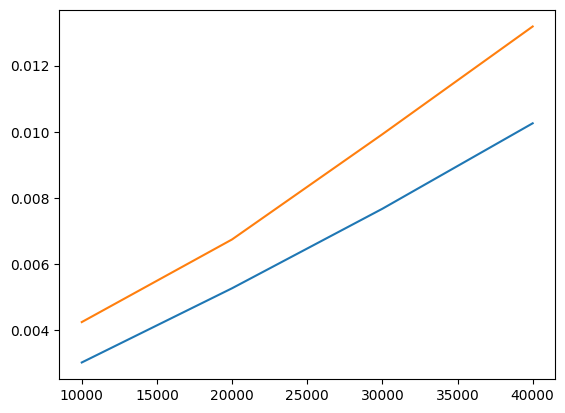

In [62]:
import matplotlib.pyplot as plt

def realizarPromedio(A):
  largoRec = len(A[0])
  largoIter = len(A[1])
  i = 0
  aux = 0
  promRec = 0
  promIter = 0
  for i in range(largoRec):
    aux += A[0][i]
  promRec = aux/largoRec
  i = 0
  for i in range(largoIter):
    aux += A[1][i]
  promIter = aux/largoIter
  return [promRec, promIter]

datos_10 = tomarTiempos(10000, 100)
datos_20 = tomarTiempos(20000, 100)
datos_30 = tomarTiempos(30000, 100)
datos_40 = tomarTiempos(40000, 100)

prom1 = realizarPromedio(datos_10)
prom2 = realizarPromedio(datos_20)
prom3 = realizarPromedio(datos_30)
prom4 = realizarPromedio(datos_40)

g_Rec = plt.plot ([10000, 20000, 30000, 40000] , [prom1[0], prom2[0], prom3[0], prom4[0]] )
g_Iter = plt.plot ([10000, 20000, 30000, 40000] , [prom1[1], prom2[1], prom3[1], prom4[1]] )
plt.show


**Pregunta 9:** Compare su gráfico con la complejidad teórica.
Concluya.

Del gráfico podemos observar que el comportamiento práctico y el teórico son correspondientes en gran medida, pues si bien no son distribuciones lineales perfectas sí se asemejan en gran manera al comportamiento teórico.